# TensorFlow Lending Club Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get data 

In [2]:
df = pd.read_csv('files/lending_club_loan_two.csv')
df.info() # 396K loans, object format some feature engineering required 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [3]:
# Lots of feature engineering required 

# extract numerical value from term 
# dummies or numerical for grade and subgrade
# extract numerical value from emp_length
# dummies for home_ownership
# dummies for verification_status
# dummies for loan status
# dummies for purpose
# Change issue_d to datetime
# Change earliest_cr_line to datetime
# dummies for initial list status
# dummies for application type
# Change address to house vs apt using NLP 
df.head().transpose()

,0,1,2,3,4
loan_amnt,10000,8000,15600,7200,24375
term,36 months,36 months,36 months,36 months,60 months
int_rate,11.44,11.99,10.49,6.49,17.27
installment,329.48,265.68,506.97,220.65,609.33
grade,B,B,B,A,C
sub_grade,B4,B5,B3,A2,C5
emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.
emp_length,10+ years,4 years,< 1 year,6 years,9 years
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE
annual_inc,117000,65000,43057,54000,55000


In [4]:
df.describe() # scaling required 

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


## EDA 

#### Check for missing values

In [5]:
df.isnull().sum() # some missing values will need to be filled in 

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

###### Employment Length

In [6]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [7]:
# Fill nan employment lengths with mode
df['emp_length'] = df['emp_length'].apply(lambda x: np.array(df['emp_length'].mode())[0] if x == 'nan' else x)

In [8]:
# Fill NaN employment lengths with mode
df['emp_length'].fillna(lambda x: np.array(df['emp_length'].mode())[0], inplace=True)

###### Mortgage Accounts

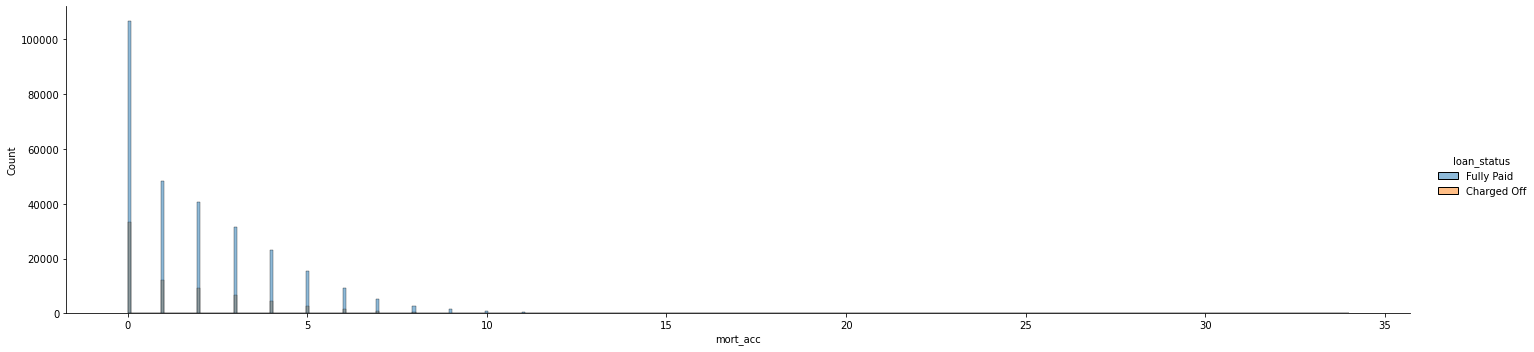

In [9]:
# very skewed use mode or median
sns.displot(x='mort_acc', data=df, hue='loan_status', aspect=4)

In [10]:
# Other method: Check for correlated features 
df.corr()['mort_acc'].sort_values() # use total acc to infer mort_acc

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [11]:
# Infer mort_acc values
inferred = df.groupby('total_acc').mean()['mort_acc']

def fill_mort(mort_acc, total_acc):
    if np.isnan(mort_acc):
        return inferred[total_acc]
    else:
        return mort_acc
    
df['mort_acc'] = df.apply(lambda x:  fill_mort(x['mort_acc'], x['total_acc']), axis=1)

In [12]:
df['mort_acc'].isnull().sum()

0

###### Public Record Bankruptcies

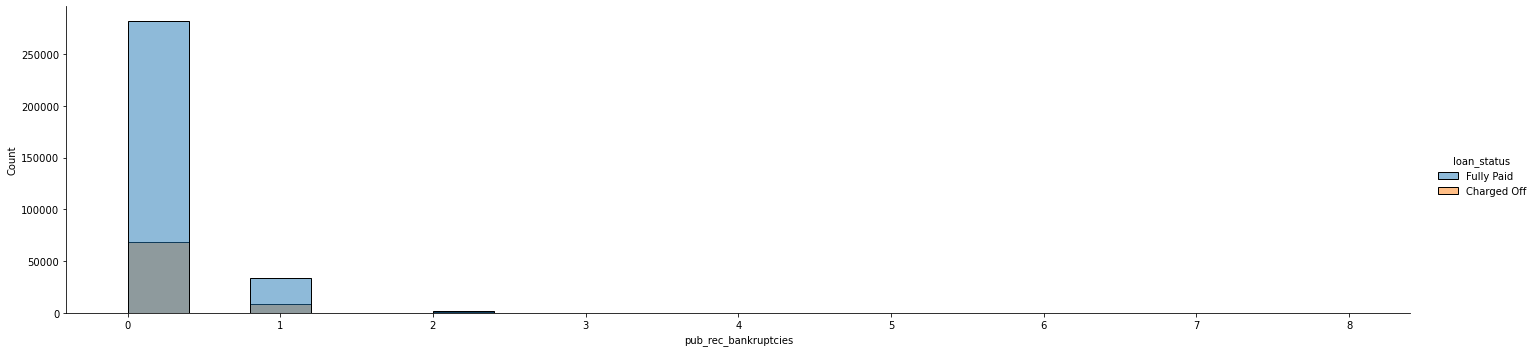

In [13]:
# very skewed use mode 0 
sns.displot(x='pub_rec_bankruptcies', data=df, hue='loan_status', aspect=4)

In [14]:
# Fill null with mode
df['pub_rec_bankruptcies'].fillna(np.array(df['pub_rec_bankruptcies'].mode())[0], inplace=True)

##### Revolving Line Utilization  

<AxesSubplot:xlabel='revol_util'>

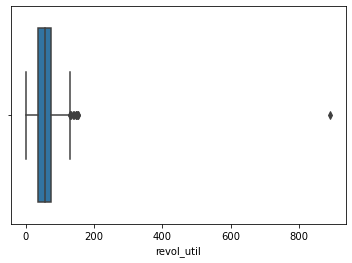

In [15]:
# Can't be more than 100%, fix outliers 
sns.boxplot(x='revol_util', data=df)

<ipython-input-16-4f09ecb21b98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['revol_util'][df['revol_util'] > 100] = 100


<AxesSubplot:xlabel='revol_util'>

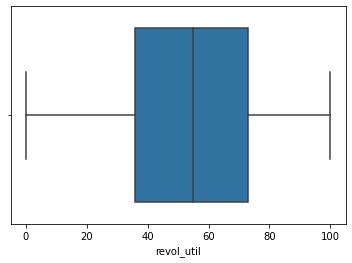

In [16]:
# remove outliers
df['revol_util'][df['revol_util'] > 100] = 100
sns.boxplot(x='revol_util', data=df)

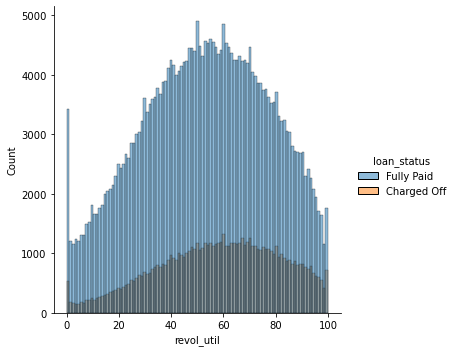

In [17]:
# fairly normal, a little skewed use median
sns.displot(x='revol_util', data=df, hue='loan_status')

In [18]:
df['revol_util'].median() # pretty good

54.8

In [19]:
# fill null values with median
df['revol_util'].fillna(df['revol_util'].median(), inplace=True)
df['revol_util'].isnull().mean() # no more nulls

0.0

In [20]:
df.isnull().sum()  # no more missing values for important features (titles not useful in our analysis)

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies        0
address                     0
dtype: int64

#### General relationship to default

<AxesSubplot:>

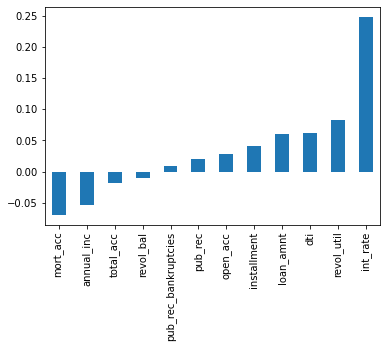

In [21]:
# interest rate highest 
df['default'] = df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)
df.corr()['default'].sort_values().drop('default').plot(kind='bar')

#### Proportion of paid vs defaulted loans

<AxesSubplot:xlabel='loan_status', ylabel='count'>

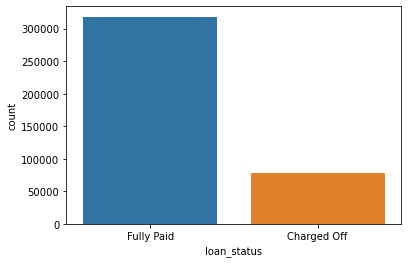

In [22]:
sns.countplot(data=df, x='loan_status')

In [23]:
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

#### Distribution of loan amount

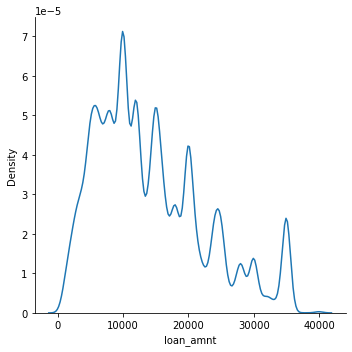

In [24]:
# most loans between 0 and 40,000 with peaks at every additional $5,000
sns.displot(data=df, x='loan_amnt', kind='kde')

#### Default rate based on Grade 

<AxesSubplot:xlabel='grade', ylabel='count'>

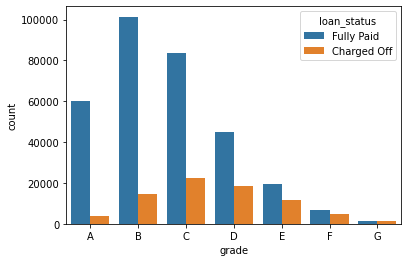

In [25]:
sns.countplot(x='grade', hue='loan_status', data=df, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

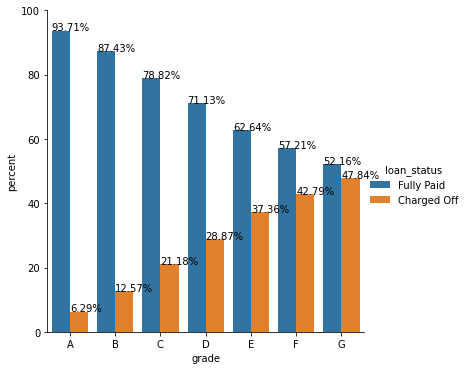

In [26]:
x,y = 'grade', 'loan_status'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

#### Default rate based on income

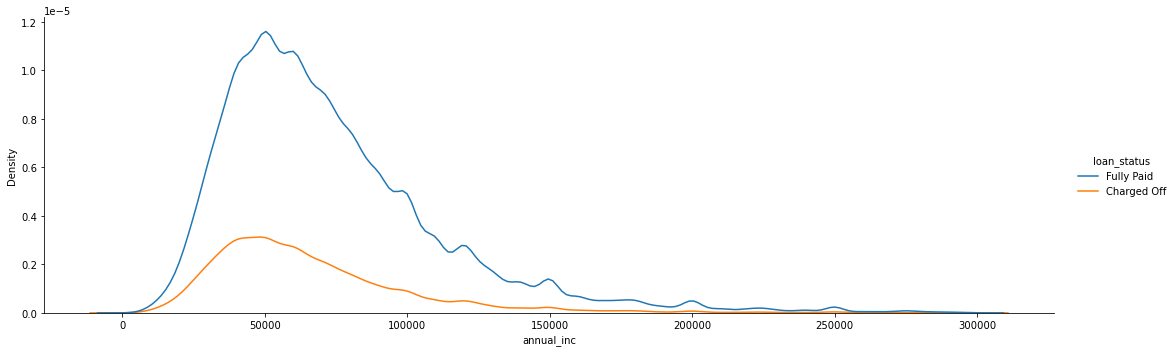

In [27]:
no_outliers = df[df['annual_inc'] < 300000]
sns.displot(x='annual_inc', data=no_outliers, hue='loan_status', kind='kde', aspect=3)

#### Loan terms based on income 

In [28]:
term = np.array(list(df['term'].apply(str.split)))[:,0]
term

array(['36', '36', '36', ..., '36', '60', '36'], dtype='<U6')

<AxesSubplot:ylabel='annual_inc'>

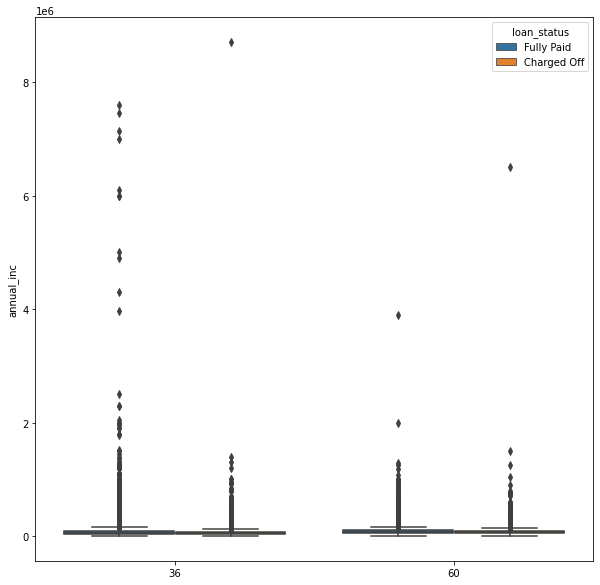

In [29]:
# outliers with high income tend to get 36 month loans
plt.figure(figsize=(10,10))
sns.boxplot(x=term, y='annual_inc', hue='loan_status', data=df)

<AxesSubplot:ylabel='annual_inc'>

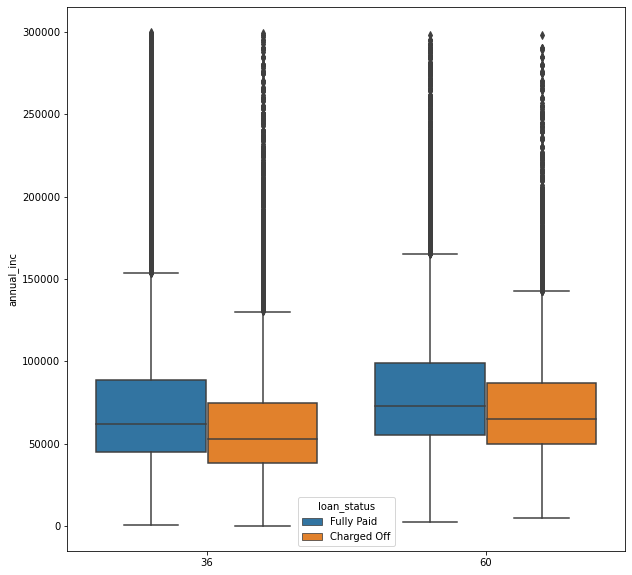

In [30]:
# for most people, they're just as likely to get 36 month or 60 month loans 
# People who default on their loans have slightly lower income irrespective of the loan term
term = np.array(list(no_outliers['term'].apply(str.split)))[:,0]
plt.figure(figsize=(10,10))
sns.boxplot(x=term, y='annual_inc', hue='loan_status', data=no_outliers)

#### Interest rate based on income

<AxesSubplot:xlabel='annual_inc', ylabel='int_rate'>

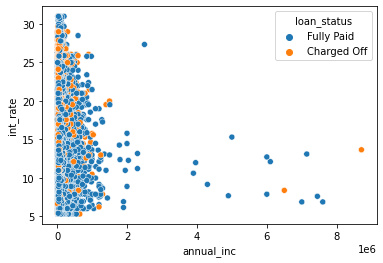

In [31]:
# People with higher annual income get lower interest rates 
sns.scatterplot(y='int_rate', x='annual_inc', data=df, hue='loan_status')

<AxesSubplot:xlabel='annual_inc', ylabel='int_rate'>

/Users/kbgazzaz/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


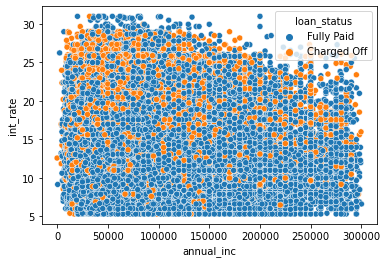

In [32]:
# most defaults happen for people with low income and high interest rates
sns.scatterplot(y='int_rate', x='annual_inc', data=no_outliers, hue='loan_status')

## Feature Engineering 

#### Turn target into dummy 

In [33]:
clean_df = df[['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']]

In [34]:
clean_df['default'] = df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)
clean_df.head()

<ipython-input-34-4921c44cd22b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['default'] = df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)


,loan_amnt,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,default
0,10000.0,11.44,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,0
1,8000.0,11.99,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,0
2,15600.0,10.49,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,0
3,7200.0,6.49,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,0
4,24375.0,17.27,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,1


#### Extract numerical value from term 

In [35]:
clean_df['term'] =  np.array(list(df['term'].apply(str.split)))[:,0].astype(float)
clean_df.head() # term now numerical

<ipython-input-35-91d0aa227c81>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['term'] =  np.array(list(df['term'].apply(str.split)))[:,0].astype(float)


,loan_amnt,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,default,term
0,10000.0,11.44,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,0,36.0
1,8000.0,11.99,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,0,36.0
2,15600.0,10.49,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,0,36.0
3,7200.0,6.49,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,0,36.0
4,24375.0,17.27,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,1,60.0


#### Transform grade to numerical values

In [36]:
# function that converts grade to numeric value
def gradeNum(grade):
    if grade == 'A':
        return 6
    elif grade == 'B':
        return 5
    elif grade == 'C':
        return 4
    elif grade == 'D':
        return 3
    elif grade == 'E':
        return 2
    elif grade == 'F':
        return 1
    else:
        return 0   
    
clean_df['grade'] = df['grade'].apply(gradeNum)
clean_df.head() # grade now numeric

<ipython-input-36-a981f5c519b2>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['grade'] = df['grade'].apply(gradeNum)


,loan_amnt,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,default,term,grade
0,10000.0,11.44,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,0,36.0,5
1,8000.0,11.99,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,0,36.0,5
2,15600.0,10.49,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,0,36.0,5
3,7200.0,6.49,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,0,36.0,6
4,24375.0,17.27,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,1,60.0,4


#### Transform subgrade to numerical values

In [37]:
# extract the numerical value from the subgrade (letter info already contained in grade)
clean_df['sub_grade'] = np.array(list(df['sub_grade'].str.split(pat='')))[:,2].astype(float) 
clean_df.head() # subgrade now numerical 

<ipython-input-37-c44bfd540f91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['sub_grade'] = np.array(list(df['sub_grade'].str.split(pat='')))[:,2].astype(float)


,loan_amnt,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,default,term,grade,sub_grade
0,10000.0,11.44,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,0,36.0,5,4.0
1,8000.0,11.99,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,0,36.0,5,5.0
2,15600.0,10.49,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,0,36.0,5,3.0
3,7200.0,6.49,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,0,36.0,6,2.0
4,24375.0,17.27,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,1,60.0,4,5.0


#### Extract numerical value from emp_length

In [38]:
df['emp_length'].value_counts()

10+ years                                126041
2 years                                   35827
< 1 year                                  31725
3 years                                   31665
5 years                                   26495
1 year                                    25882
4 years                                   23952
6 years                                   20841
7 years                                   20819
8 years                                   19168
<function <lambda> at 0x7f897dc233a0>     18301
9 years                                   15314
Name: emp_length, dtype: int64

In [39]:
# function converts employment length to numeric value
def employment(emp):
    # less than 1 year
    if str(emp)[0] == '<':
        return 0
    # more than 10 years
    elif str(emp)[2] == '+':
        return 10 
    # 1-9 years 
    else: 
        return str(emp).split()[0]


clean_df['emp_length'] = df['emp_length'].apply(employment).astype(float)
clean_df.head() # employment length now numeric

<ipython-input-39-7528bb679abf>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['emp_length'] = df['emp_length'].apply(employment).astype(float)


,loan_amnt,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,default,term,grade,sub_grade,emp_length
0,10000.0,11.44,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,0,36.0,5,4.0,10.0
1,8000.0,11.99,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,0,36.0,5,5.0,4.0
2,15600.0,10.49,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,0,36.0,5,3.0,0.0
3,7200.0,6.49,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,0,36.0,6,2.0,6.0
4,24375.0,17.27,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,1,60.0,4,5.0,9.0


#### Change issue_d to datetime


In [40]:
df['issue_d'] = pd.to_datetime(df['issue_d'])
clean_df['issue_month'] = df['issue_d'].dt.month
clean_df['issue_year'] = df['issue_d'].dt.year

clean_df.head() # month and year added

<ipython-input-40-6f062c7df02a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['issue_month'] = df['issue_d'].dt.month
<ipython-input-40-6f062c7df02a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['issue_year'] = df['issue_d'].dt.year


,loan_amnt,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,default,term,grade,sub_grade,emp_length,issue_month,issue_year
0,10000.0,11.44,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,0,36.0,5,4.0,10.0,1,2015
1,8000.0,11.99,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,0,36.0,5,5.0,4.0,1,2015
2,15600.0,10.49,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,0,36.0,5,3.0,0.0,1,2015
3,7200.0,6.49,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,0,36.0,6,2.0,6.0,11,2014
4,24375.0,17.27,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,1,60.0,4,5.0,9.0,4,2013


#### Change earliest_cr_line to datetime

In [41]:
clean_df['credit_start_year'] = pd.to_datetime(df['earliest_cr_line']).dt.year # earliest credit line year (month probably not important)
clean_df.head()

<ipython-input-41-0cde0f472b9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['credit_start_year'] = pd.to_datetime(df['earliest_cr_line']).dt.year # earliest credit line year (month probably not important)


,loan_amnt,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,default,term,grade,sub_grade,emp_length,issue_month,issue_year,credit_start_year
0,10000.0,11.44,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,0,36.0,5,4.0,10.0,1,2015,1990
1,8000.0,11.99,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,0,36.0,5,5.0,4.0,1,2015,2004
2,15600.0,10.49,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,0,36.0,5,3.0,0.0,1,2015,2007
3,7200.0,6.49,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,0,36.0,6,2.0,6.0,11,2014,2006
4,24375.0,17.27,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,1,60.0,4,5.0,9.0,4,2013,1999


#### Add the difference between issue_year and credit_start_year

In [42]:
clean_df['time_diff'] = clean_df['issue_year'] - clean_df['credit_start_year']
clean_df.head()

<ipython-input-42-7433f7800e21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['time_diff'] = clean_df['issue_year'] - clean_df['credit_start_year']


,loan_amnt,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,default,term,grade,sub_grade,emp_length,issue_month,issue_year,credit_start_year,time_diff
0,10000.0,11.44,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,0,36.0,5,4.0,10.0,1,2015,1990,25
1,8000.0,11.99,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,0,36.0,5,5.0,4.0,1,2015,2004,11
2,15600.0,10.49,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,0,36.0,5,3.0,0.0,1,2015,2007,8
3,7200.0,6.49,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,0,36.0,6,2.0,6.0,11,2014,2006,8
4,24375.0,17.27,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,1,60.0,4,5.0,9.0,4,2013,1999,14


#### Extract house or apartment info from address

In [43]:
df['address'].head(20)

0          0174 Michelle Gateway\nMendozaberg, OK 22690
1       1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2       87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                 823 Reid Ford\nDelacruzside, MA 00813
4                  679 Luna Roads\nGreggshire, VA 11650
5     1726 Cooper Passage Suite 129\nNorth Deniseber...
6     1008 Erika Vista Suite 748\nEast Stephanie, TX...
7                             USCGC Nunez\nFPO AE 30723
8                              USCGC Tran\nFPO AP 22690
9                  3390 Luis Rue\nMauricestad, VA 00813
10            40245 Cody Drives\nBartlettfort, NM 00813
11     3126 Sean Dale Apt. 141\nSouth Matthew, MS 00813
12       4173 David Extension\nWest Beckyfort, MS 70466
13             3343 Wells Mews\nShellychester, OR 29597
14    0472 Weber Manors Apt. 660\nLake Andrew, NH 29597
15     11629 Sean Hills Suite 614\nStevenfort, HI 30723
16    407 Briggs Lodge Suite 778\nWest Aprilborough,...
17    487 Jennifer Parkway Suite 940\nCummingssh

In [44]:
# function determines if house 0 or apartment 1
def houseType(address):
    # apartment
    if 'apt' in address.lower():
        return 1 
    elif 'unit' in address.lower():
        return 1 
    elif 'suite' in address.lower():
        return 1 
    elif 'ste' in address.lower():
        return 1 
        
    # house
    else:
        return 0 
    
clean_df['houseType'] = df['address'].apply(houseType)
clean_df.head() # house type added

<ipython-input-44-74fd8510ded6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['houseType'] = df['address'].apply(houseType)


,loan_amnt,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,...,default,term,grade,sub_grade,emp_length,issue_month,issue_year,credit_start_year,time_diff,houseType
0,10000.0,11.44,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,...,0,36.0,5,4.0,10.0,1,2015,1990,25,0
1,8000.0,11.99,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,...,0,36.0,5,5.0,4.0,1,2015,2004,11,1
2,15600.0,10.49,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,...,0,36.0,5,3.0,0.0,1,2015,2007,8,1
3,7200.0,6.49,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,...,0,36.0,6,2.0,6.0,11,2014,2006,8,0
4,24375.0,17.27,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,...,1,60.0,4,5.0,9.0,4,2013,1999,14,0


#### Get the zip code from the address

In [45]:
df['zip_code'] = df['address'].apply(lambda address: address[-5:])
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,default,zip_code
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",0,22690
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",0,05113
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",0,05113
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",0,00813
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",1,11650


#### Make dummies for home_ownership, verification_status, purpose, initial_list_status, application_type, sub_grade, zip_code

In [46]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [47]:
df['home_ownership'] = df.home_ownership.replace(['NONE', 'ANY'], 'OTHER') # add none and any to the other category
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

In [48]:
df['verification_status'].value_counts()

Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64

In [49]:
df['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [50]:
df['application_type'].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [51]:
df['zip_code'].value_counts()

70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: zip_code, dtype: int64

In [52]:
dummies = pd.get_dummies(df[['home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type', 'sub_grade', 'zip_code']], drop_first=True)
dummies.head() # dummy variables 

,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,...,sub_grade_G5,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,1,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [53]:
# concatenate dummies and clean features dataframe
clean_df = pd.concat([clean_df, dummies], axis = 1)
clean_df.head()

,loan_amnt,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,...,sub_grade_G5,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,10000.0,11.44,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,8000.0,11.99,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,10.49,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,...,0,1,0,0,0,0,0,0,0,0
3,7200.0,6.49,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,17.27,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,...,0,0,1,0,0,0,0,0,0,0


In [54]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 85 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   int_rate                             396030 non-null  float64
 2   annual_inc                           396030 non-null  float64
 3   dti                                  396030 non-null  float64
 4   open_acc                             396030 non-null  float64
 5   pub_rec                              396030 non-null  float64
 6   revol_bal                            396030 non-null  float64
 7   revol_util                           396030 non-null  float64
 8   total_acc                            396030 non-null  float64
 9   mort_acc                             396030 non-null  float64
 10  pub_rec_bankruptcies                 396030 non-null  float64
 11  default      

In [55]:
clean_df = clean_df.astype(float)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 85 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   int_rate                             396030 non-null  float64
 2   annual_inc                           396030 non-null  float64
 3   dti                                  396030 non-null  float64
 4   open_acc                             396030 non-null  float64
 5   pub_rec                              396030 non-null  float64
 6   revol_bal                            396030 non-null  float64
 7   revol_util                           396030 non-null  float64
 8   total_acc                            396030 non-null  float64
 9   mort_acc                             396030 non-null  float64
 10  pub_rec_bankruptcies                 396030 non-null  float64
 11  default      

In [56]:
for col in clean_df.columns:
    if clean_df[col].isnull().sum() > 0:
        print(col)

## Data Preprocessing

### Split into train and test 

In [57]:
X = clean_df.drop('default', axis=1).values
y = clean_df['default'].values

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.3)

### Scale Features

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
scaler = MinMaxScaler()

In [62]:
X_train = scaler.fit_transform(X_train)

In [63]:
X_valid = scaler.transform(X_valid)

In [64]:
X_test = scaler.transform(X_test)

In [65]:
X_train[0]

array([0.34177215, 0.36345929, 0.01056672, 0.00229323, 0.10526316,
       0.        , 0.01227516, 0.978     , 0.17567568, 0.0636191 ,
       0.        , 0.        , 0.66666667, 0.5       , 0.1       ,
       0.09090909, 0.55555556, 0.6984127 , 0.24590164, 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Modelling 
#### Build model

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.initializers import RandomNormal, Constant
from tensorflow.keras.optimizers import Adam

In [67]:
X_train.shape

(207915, 84)

In [68]:
model = Sequential()

model.add(Dense(84, activation=LeakyReLU(alpha=0.1)))
model.add(Dropout(0.2))

model.add(Dense(42, activation=LeakyReLU(alpha=0.1), kernel_initializer=RandomNormal(stddev=0.01), use_bias=True))
model.add(Dropout(0.4))

model.add(Dense(21, activation=LeakyReLU(alpha=0.1), kernel_initializer=RandomNormal(stddev=0.01), use_bias=True))

model.add(Dense(1, activation='sigmoid', use_bias=True, bias_initializer=Constant(0.3)))

#### Compile model

In [69]:
model.compile(optimizer=Adam(lr=0.001, clipnorm=1), loss='binary_crossentropy')

#### Define early stopping condition

In [70]:
from tensorflow.keras.callbacks import EarlyStopping

In [71]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25)

#### Fit model

In [72]:
model.fit(X_train, y_train, batch_size=256, epochs=1000, validation_data=(X_valid, y_valid), callbacks=early_stop)

Epoch 1/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.3053 - val_loss: 0.2648
Epoch 2/1000
813/813 [==============================] - 1s 2ms/step - loss: 0.2651 - val_loss: 0.2612
Epoch 3/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.2617 - val_loss: 0.2602
Epoch 4/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.2598 - val_loss: 0.2606
Epoch 5/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.2589 - val_loss: 0.2589
Epoch 6/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.2583 - val_loss: 0.2590
Epoch 7/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.2579 - val_loss: 0.2586
Epoch 8/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.2569 - val_loss: 0.2584
Epoch 9/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.2566 - val_loss: 0.2580
Epoch 10/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.256

813/813 [==============================] - 1s 1ms/step - loss: 0.2480 - val_loss: 0.2562
Epoch 81/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.2479 - val_loss: 0.2562
Epoch 82/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.2476 - val_loss: 0.2591
Epoch 83/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.2481 - val_loss: 0.2562
Epoch 84/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.2478 - val_loss: 0.2561
Epoch 85/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.2477 - val_loss: 0.2558
Epoch 86/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.2477 - val_loss: 0.2557
Epoch 87/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.2476 - val_loss: 0.2564
Epoch 88/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.2475 - val_loss: 0.2562
Epoch 89/1000
813/813 [==============================] - 1s 1ms/step - loss: 0.2475 - v

#### Check training history

In [73]:
print(model.weights)

[<tf.Variable 'dense/kernel:0' shape=(84, 84) dtype=float32, numpy=
array([[-0.35953462,  0.29041827, -0.27976486, ...,  0.02876807,
         0.47486347, -0.07777961],
       [-0.08528773, -0.48133707,  0.66225845, ...,  0.21748593,
         0.21784316, -0.30747718],
       [ 1.8526597 , -5.149407  ,  6.271571  , ...,  2.2669442 ,
         3.8113186 ,  1.859478  ],
       ...,
       [-0.22694571, -0.08753389,  0.08948564, ..., -0.53769314,
        -0.4295924 , -0.51494694],
       [-2.1381543 ,  3.7215157 , -1.9731566 , ..., -2.444689  ,
        -1.8460236 , -1.3593471 ],
       [-1.9417794 ,  4.725709  , -0.2012289 , ..., -1.5273113 ,
        -0.45801228, -1.7350023 ]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(84,) dtype=float32, numpy=
array([-0.05991507, -0.1152989 , -0.04293363,  0.01338159, -0.2138591 ,
       -0.04413176, -0.11347327,  0.0200987 , -0.14888465, -0.02461872,
       -0.12535737,  0.05929631, -0.19218475,  0.08982638,  0.11381026,
       -0.02397898, -0.0

<AxesSubplot:>

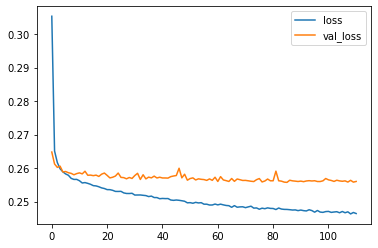

In [74]:
losses = pd.DataFrame(model.history.history)
losses.plot()

#### Make predictions

In [75]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


#### Evaluate model performance

In [76]:
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot:>

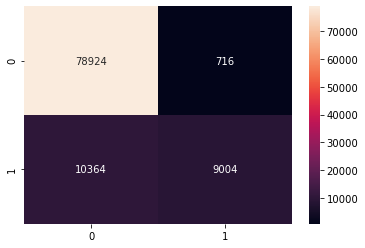

In [77]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g')

In [78]:
print(classification_report(y_test, predictions)) # Need to improve recall (/f1) for defaulted loans

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93     79640
         1.0       0.93      0.46      0.62     19368

    accuracy                           0.89     99008
   macro avg       0.91      0.73      0.78     99008
weighted avg       0.89      0.89      0.87     99008



#### Save model

In [79]:
model.save('files/lendingModel.h5')